# Tools and Methods of Data Analysis
## Session 6 - Part 1

Niels Hoppe <<niels.hoppe.extern@srh.de>>

In [24]:
import math
import numpy as np
import seaborn as sns
from scipy import stats

### Proportions

Statistical parameter $\pi$ (or $p$ in a sample) for

* categorical/qualitative data or
* quantitative data mapped to a categories.

Examples:

* Proportion of voters for a particular party (parties = categories)
* Proportion of people with income >= 100k (income is quantitative, but mapped to categories: income < 100k and income >= 100k)

### Proportions (cont.)

The standard deviation of $p$ is calculated as

$$
\sigma_p = \sqrt{\frac{p \cdot (1 - p)}{n}}
$$

### Confidence Intervals

1. Calculate confidence interval
    * for population mean
    * for population proportion
2. Determine sample size
    * for population mean
    * for population proportion

### Reminder: Generalization and Transfer of Findings

* Findings are always limited to the studied sample.
* Findings from representative samples can be generalized to the population.
* Findings can not generally be transferred to another population.
* Even if two populations are technically comparable, there may be unknown parameters in play.

### Point Estimates

Population parameters can be estimated from a sample:

| Parameter  | Population | Sample    | Estimate       |
|------------|------------|-----------|----------------|
| Proportion | $\pi$      | p         | $\hat{\pi}$    |
| Mean       | $\mu$      | $\bar{x}$ | $\hat{\mu}$    |
| Std. dev.  | $\sigma$   | s         | $\hat{\sigma}$ |

Experiment

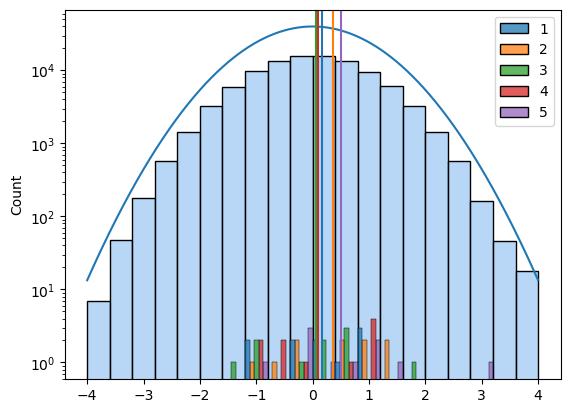

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

def histplot(data, color_palette, color):
    sns.histplot(data, stat='count',
                 bins=20, binrange=(-4, 4),
                 color=color_palette[color],
                 log_scale=(False, True),
                 multiple='dodge',)#discrete=True)

def meanplot(data, color_palette, color):
    plt.axvline(data.mean(), 0, 1, color=color_palette[color])


def sample(size, n=1):
    
    population = pd.Series(stats.norm.rvs(0, 1, size=100000))
    samples = pd.DataFrame({ i: population.sample(n=size) for i in range(1, n+1) })
    
    x = np.arange(-4, 4, 0.001)
    norm_values = stats.norm.pdf(x, 0, 1) * 100000

    plt.plot(x, norm_values)

    histplot(population, sns.color_palette('pastel'), 0)
    #meanplot(population, sns.color_palette('bright'), 0)

    histplot(samples, sns.color_palette('pastel'), 0)
    for i, mu in enumerate(samples.mean()):
        #meanplot(sample, sns.color_palette('bright'), i+1)
        plt.axvline(mu, 0, 1, color=sns.color_palette()[i])

    plt.show()

sample(10, 5)

### General Formula

Given

* a point estimate $\hat{X}$,
* a critical value $Z$ and
* the standard error $e$,

a confidence interval is caluclated as $\hat{X} \pm Z \cdot e$.

Where do $\hat{X}$, $Z$ and $e$ come from?

### General Formula (cont.)

$\hat{X}$ is a point estimate from a sample, e.g. $\hat{\mu}$ or $\hat{\pi}$.

$Z$ is based on the underlying distribution, e.g. normal distribution or t-distribution.

$e$ is the standard error and is calculated depending on $\hat{X}$.

### General Formula: Determining $Z$

Use the percent point function of the underlying distribution.

Confidence level $l$ determines $x$:

$$x = \frac{1 - l}{2}$$

For confidence level $l = 0.95$ or $\alpha = 1 - l = 0.05$:

In [26]:
stats.norm.ppf((1 - 0.95) / 2)

-1.959963984540054

### Calculate CI for the Mean

The general formula for confidence intervals applied to the mean:

$$
\bar{x} \pm Z_{norm} \frac{\sigma}{\sqrt{n}}
\qquad\text{ or }\qquad
\bar{x} \pm Z_{t} \frac{s}{\sqrt{n}}
$$

### Calculate CI for the Mean

A sample of 11 circuits from a large normal population has a mean resistance of 2.20 ohms.
We know from past testing that the population standard deviation is .35 ohms.  
Determine a 95% confidence interval for the true mean resistance of the population.

In [27]:
stats.norm.interval(0.95,
            loc = 2.2,
            scale = 0.35 / math.sqrt(11)
            )

(1.9931670182940682, 2.406832981705932)

In [28]:
stats.t.interval(0.95,
            df = 11 - 1,
            loc = 2.2,
            scale = 0.35 / math.sqrt(11)
            )

(1.964866800593334, 2.4351331994066663)

### Calculate CI for the Mean (cont.)

In [29]:
import math
from scipy import stats

def t_interval(confidence, series):
    n = series.size
    return stats.t.interval(confidence,
                            df = n - 1,
                            loc = series.mean(),
                            scale = series.std() / math.sqrt(n)
                            )


### Calculate CI for the Mean (cont.)

In [30]:
import math
from scipy import stats

def t_interval(confidence, series, alternative='two-sided'):
    if alternative == 'less':
        p_tail = 1 - confidence
        lb, ub = 0, 1 - p_tail
    elif alternative == 'greater':
        p_tail = 1 - confidence
        lb, ub = p_tail, 1
    else: # elif alternative == 'two-sided':
        p_tail = (1 - confidence) / 2
        lb, ub = p_tail, 1 - p_tail
    return stats.t.ppf([lb, ub],
            df = series.size - 1,
            loc = series.mean(),
            scale = series.std() / math.sqrt(series.size)
            )

### Calculate CI for Proportion

The general formula for confidence intervals applied to proportions:

$$
p \pm Z \sqrt{\frac{p \cdot (1 - p)}{n}}
$$

### Calculate CI for Proportion

A random sample of 100 people shows that 25 are left-handed.
Form a 95% confidence interval for the true proportion of left-handers

In [31]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(25, 100, 1 - 0.95)

(0.1651310699442871, 0.3348689300557129)

In [32]:
from statsmodels.stats.proportion import proportion_confint

def prop_interval(confidence, success, total):
    return proportion_confint(success, total, 1 - confidence)

### Determining Sample Size

* for mean $\mu$
* for proportion $\pi$

based on $e$ and and $\alpha$.

### Determining Sample Size for Mean

$$
e = Z \cdot \frac{\sigma}{\sqrt{n}}
\qquad \Rarr \qquad
n = \frac{Z^2 \cdot \sigma^2}{e^2}
$$

### Determining Sample Size for Mean (cont.)

If $\sigma = 45$, what sample size is needed to estimate the mean within $\pm 5$ with $90\%$ confidence?

In [33]:
def critical_value_norm(alpha):
    return stats.norm.ppf(1 - (alpha) / 2)

def samplesize_confint_norm(std, half_length, alpha):
    z = critical_value_norm(alpha)
    return (z**2 * std**2) / half_length**2

samplesize_confint_norm(45, 5, 1 - 0.9)

219.14901978172847

### Determining Sample Size for Proportion

$$
e = Z \cdot \frac{p \cdot (1 - p)}{n}
\qquad \Rarr \qquad
n = \frac{Z^2 \cdot p \cdot (1 - p)}{e^2}
$$

### Determining Sample Size for Proportion (cont.)

How large a sample would be necessary to estimate the true proportion defective in a large population within $\pm 3\%$, with $95\%$ confidence?

Assume a pilot sample yields $p = .12$.

In [34]:
from statsmodels.stats.proportion import samplesize_confint_proportion

samplesize_confint_proportion(proportion=.12, half_length=0.03, alpha=.05)

450.7311682947776